## SPR - Fundamentals of Signal Processing

#### 1. Generate and Plot Basic **Signals**


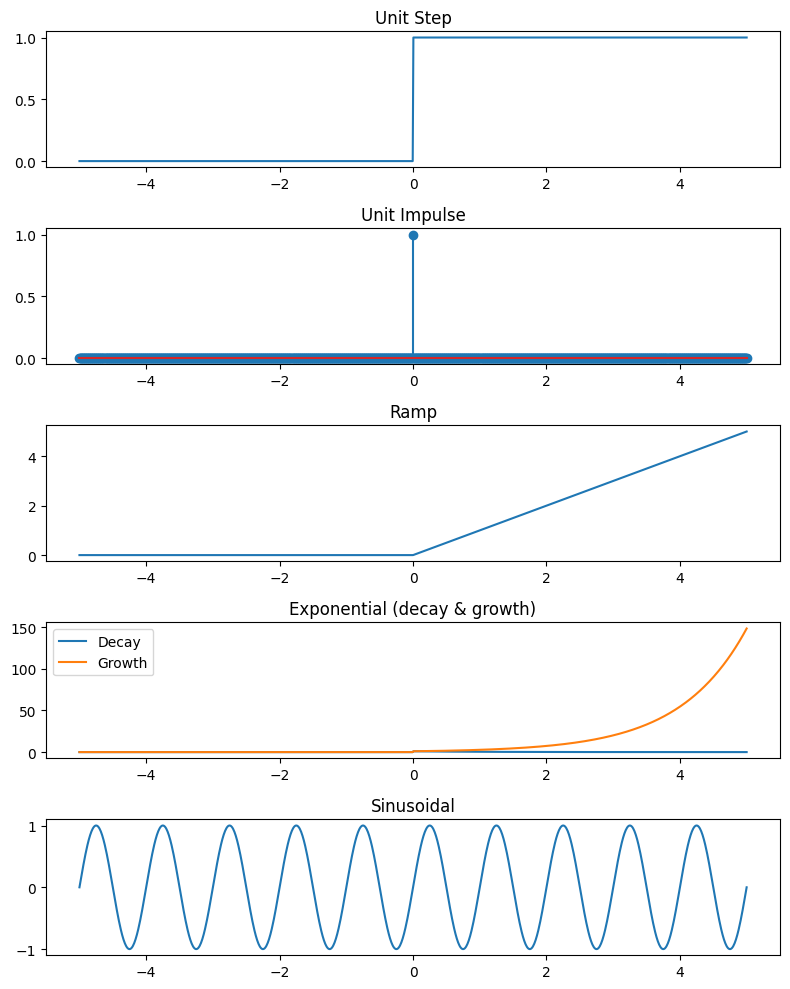

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-5, 5, 1000)  # time axis

# (a) Unit Step
u = np.heaviside(t, 1)

# (b) Unit Impulse (delta ~ approximated)
delta = np.zeros_like(t)
delta[np.argmin(np.abs(t))] = 1  # 1 at t=0

# (c) Ramp
r = t * (t >= 0)

# (d) Exponential
exp_decay = np.exp(-t) * (t >= 0)
exp_growth = np.exp(t) * (t >= 0)

# (e) Sinusoidal
sin_signal = np.sin(2 * np.pi * 1 * t)  # 1 Hz

plt.figure(figsize=(8, 10))

plt.subplot(5, 1, 1)
plt.title("Unit Step")
plt.plot(t, u)

plt.subplot(5, 1, 2)
plt.title("Unit Impulse")
plt.stem(t, delta)

plt.subplot(5, 1, 3)
plt.title("Ramp")
plt.plot(t, r)

plt.subplot(5, 1, 4)
plt.title("Exponential (decay & growth)")
plt.plot(t, exp_decay, label="Decay")
plt.plot(t, exp_growth, label="Growth")
plt.legend()

plt.subplot(5, 1, 5)
plt.title("Sinusoidal")
plt.plot(t, sin_signal)

plt.tight_layout()
plt.show()


#### 2. Sampling and Aliasing

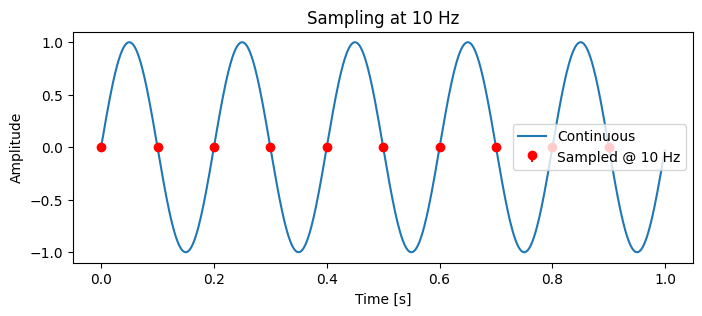

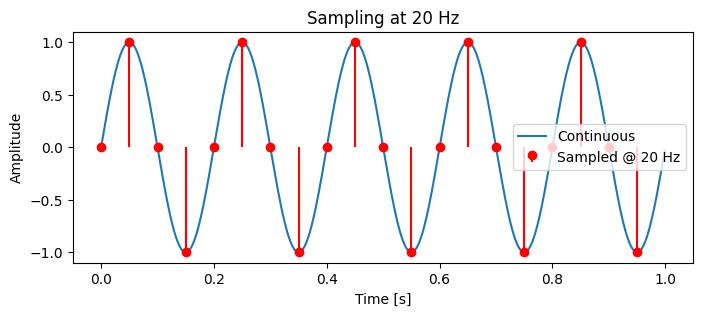

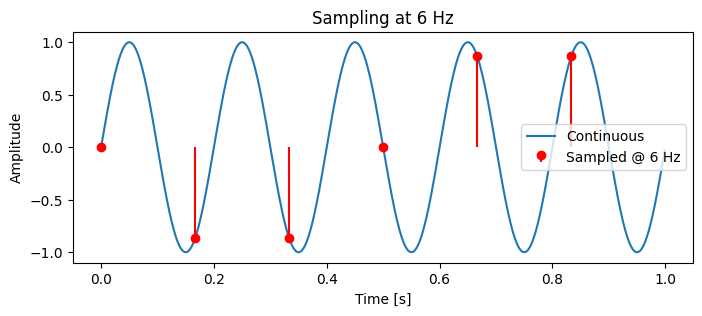

In [5]:
# Continuous signal: 5 Hz sine, 1 sec
fs_cont = 1000  # "continuous" high sampling rate
t_cont = np.linspace(0, 1, fs_cont, endpoint=False)
x_cont = np.sin(2 * np.pi * 5 * t_cont)

# Different sampling rates
fs_nyquist = 2*5  # 10 Hz
fs_above = 20
fs_below = 6

for fs in [fs_nyquist, fs_above, fs_below]:
    t_samp = np.arange(0, 1, 1/fs)
    x_samp = np.sin(2 * np.pi * 5 * t_samp)
    plt.figure(figsize=(8,3))
    plt.plot(t_cont, x_cont, label="Continuous")
    plt.stem(t_samp, x_samp, linefmt='r-', markerfmt='ro', basefmt=' ', label=f"Sampled @ {fs} Hz")
    plt.title(f"Sampling at {fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


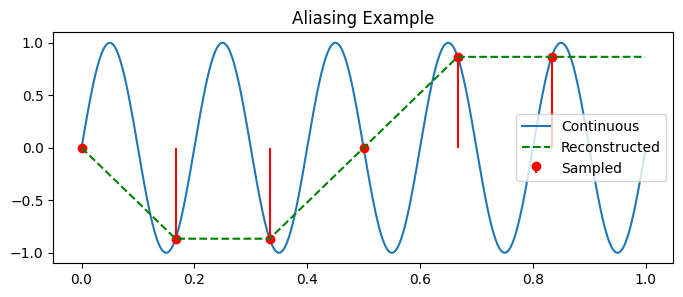

In [13]:
# To reconstruct, use simple interpolation:

from scipy.interpolate import interp1d

fs = 6  # undersampled
t_samp = np.arange(0, 1, 1/fs)
x_samp = np.sin(2*np.pi*5*t_samp)
f = interp1d(t_samp, x_samp, kind='linear', fill_value='extrapolate')
x_recon = f(t_cont)

plt.figure(figsize=(8,3))
plt.plot(t_cont, x_cont, label='Continuous')
plt.stem(t_samp, x_samp, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sampled')
plt.plot(t_cont, x_recon, 'g--', label='Reconstructed')
plt.title("Aliasing Example")
plt.legend()
plt.show()


#### 3. Sinusoid with given parameters

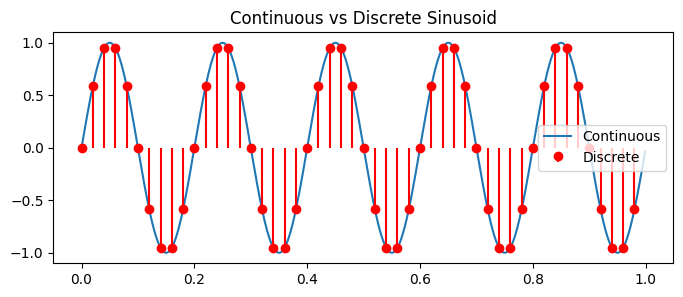

In [9]:
A = 1
f = 5
duration = 1
t_cont = np.linspace(0, duration, 1000, endpoint=False)
x_cont = A*np.sin(2*np.pi*f*t_cont)

fs = 50  # discrete sampling
t_disc = np.arange(0, duration, 1/fs)
x_disc = A*np.sin(2*np.pi*f*t_disc)

plt.figure(figsize=(8,3))
plt.plot(t_cont, x_cont, label='Continuous')
plt.stem(t_disc, x_disc, linefmt='r-', markerfmt='ro', basefmt=' ', label='Discrete')
plt.legend()
plt.title("Continuous vs Discrete Sinusoid")
plt.show()


#### 4. Time Shifting and Scaling

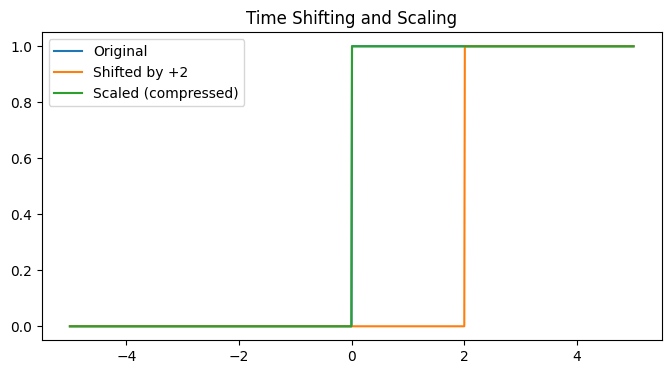

In [10]:
t = np.linspace(-5, 5, 1000)
u = np.heaviside(t, 1)

# Shift by +2 (delay)
u_shifted = np.heaviside(t-2, 1)

# Scale by 2 (compress)
u_scaled = np.heaviside(2*t, 1)

plt.figure(figsize=(8,4))
plt.plot(t, u, label='Original')
plt.plot(t, u_shifted, label='Shifted by +2')
plt.plot(t, u_scaled, label='Scaled (compressed)')
plt.title("Time Shifting and Scaling")
plt.legend()
plt.show()


#### 5. Superposition of Sinusoids

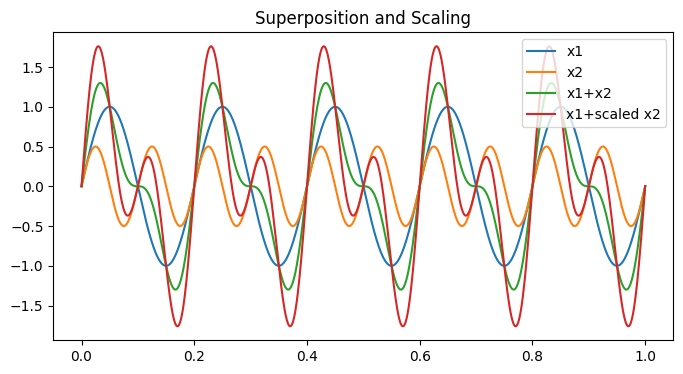

In [11]:
t = np.linspace(0,1,1000)
x1 = 1*np.sin(2*np.pi*5*t)
x2 = 0.5*np.sin(2*np.pi*10*t)

x_sum = x1 + x2
x2_scaled = 2*x2  # scaling second signal

plt.figure(figsize=(8,4))
plt.plot(t, x1, label='x1')
plt.plot(t, x2, label='x2')
plt.plot(t, x_sum, label='x1+x2')
plt.plot(t, x1+x2_scaled, label='x1+scaled x2')
plt.legend()
plt.title("Superposition and Scaling")
plt.show()


#### 6.Noise Addition and Filtering


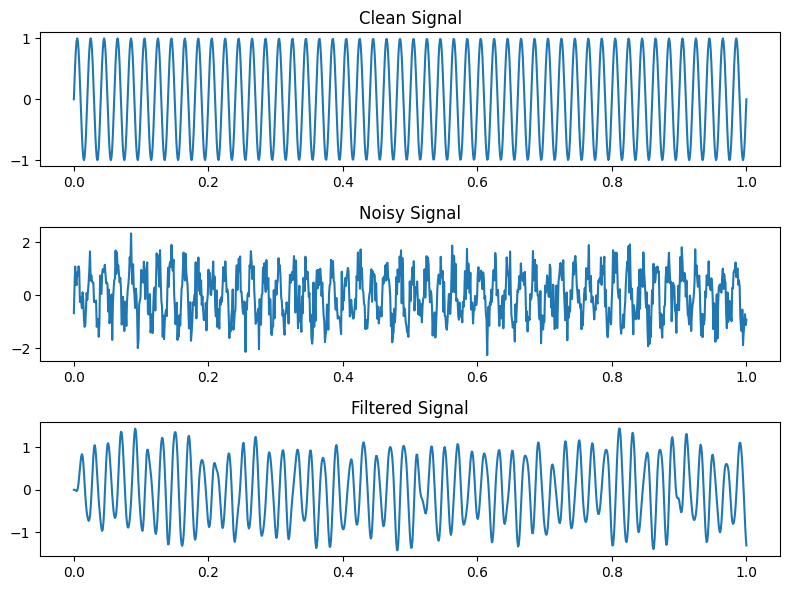

In [12]:
from scipy.signal import butter, lfilter

# Clean signal
fs = 1000
t = np.linspace(0,1,fs)
x_clean = np.sin(2*np.pi*50*t)  # 50 Hz sine

# Add Gaussian noise
noise = np.random.normal(0, 0.5, t.shape)
x_noisy = x_clean + noise

# Low-pass filter (cutoff 100 Hz)
b, a = butter(6, 100/(fs/2), btype='low')
x_filtered = lfilter(b, a, x_noisy)

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.title("Clean Signal")
plt.plot(t, x_clean)
plt.subplot(3,1,2)
plt.title("Noisy Signal")
plt.plot(t, x_noisy)
plt.subplot(3,1,3)
plt.title("Filtered Signal")
plt.plot(t, x_filtered)
plt.tight_layout()
plt.show()
